In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats, optimize
import os
# import atpy
def nice_string_output(d, extra_spacing=5, decimals=3):
    """ 
    Takes a dictionary d consisting of names and values to be properly formatted.
    Makes sure that the distance between the names and the values in the printed
    output has a minimum distance of 'extra_spacing'. One can change the number
    of decimals using the 'decimals' keyword.  
    """
    
    names = d.keys()
    max_names = len_of_longest_string(names)
    
    values = values_to_string(d.values(), decimals=decimals)
    max_values = len_of_longest_string(values)
    
    string = ""
    for name, value in zip(names, values):
        spacing = extra_spacing + max_values + max_names - len(name) - 1 
        string += "{name:s} {value:>{spacing}} \n".format(name=name, value=value, spacing=spacing)
    return string[:-2]

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import Planck15

# dist1 = Distance(unit=u.pc, z = z1, cosmology = Planck15)

In [3]:
red=np.random.uniform(0,10**3,10**3)
blue=np.random.uniform(0,10**3,10**3)

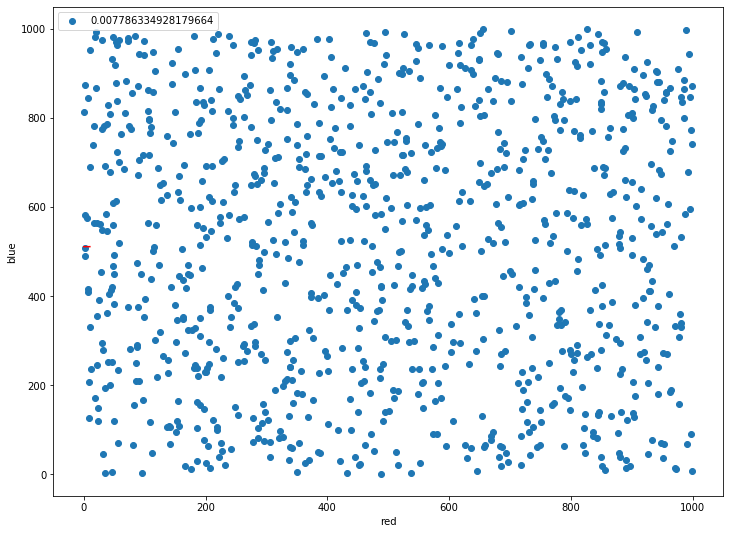

In [4]:
def line(x,a,b):
    return a*x+b
val, cov=optimize.curve_fit(line, red, blue)
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(red, blue, label=stats.pearsonr(red, blue)[0])
ran=np.linspace(0,10,10000)
ax.plot(ran,val[0]*ran+val[1], 'r')
ax.set(xlabel='red', ylabel='blue')
plt.legend()

In [5]:
s=0
n=10**5
for i in range(n):
    red=np.random.uniform(0,10,10**3)
    blue=np.random.uniform(0,10,10**3)
    s+=stats.pearsonr(red, blue)[0]
s/n

-0.00021189368249192016

In [6]:
redshift=np.random.uniform(0.95,1.05,1000)
dist = Distance(unit=u.pc, z = redshift, cosmology = Planck15)
dist=dist.value
redl, bluel=(dist)**2*red, (dist)**2*blue

C:\Users\chris\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


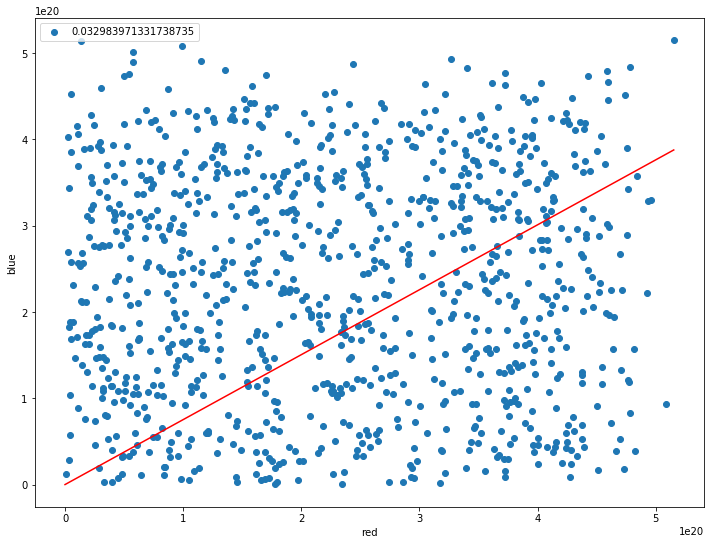

In [7]:
val, cov=optimize.curve_fit(line, redl, bluel)
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(redl, bluel, label=stats.pearsonr(redl, bluel)[0])
ran=np.linspace(0,max(redl),10000)
ax.plot(ran,val[0]*ran+val[1], 'r')
ax.set(xlabel='red', ylabel='blue')
plt.legend()

In [8]:
s=0
n=10**3
for i in range(n):
    redshift=np.random.uniform(0.95,1.05,1000)
    dist = Distance(unit=u.pc, z = redshift, cosmology = Planck15)
    dist=dist.value
    redl=(dist)**2*red
    bluel=(dist)**2*blue
    s+=stats.pearsonr(redl, bluel)[0]
s/n

0.035776263118405816

In [9]:
redshift=np.random.uniform(0.1,10,1000)
dist = Distance(unit=u.pc, z = redshift, cosmology = Planck15)
dist=dist.value
redl, bluel=(dist)**2*red, (dist)**2*blue

0.8266143087178017

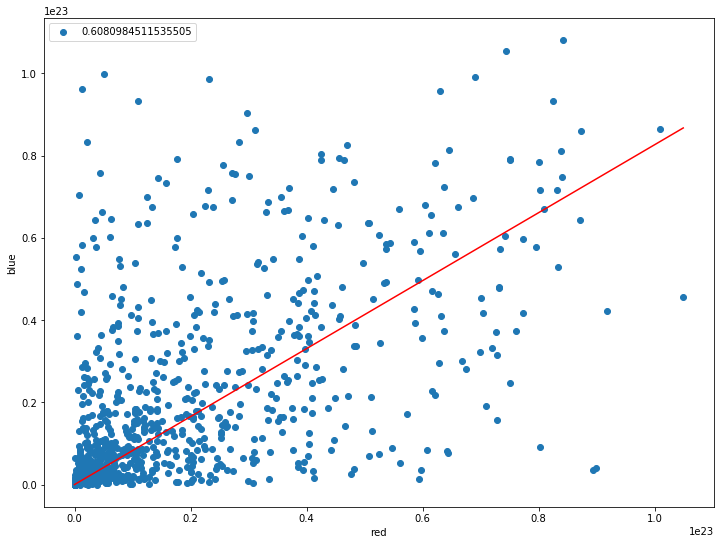

In [10]:
val, cov=optimize.curve_fit(line, redl, bluel)
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(redl, bluel, label=stats.pearsonr(redl, bluel)[0])
ran=np.linspace(0,max(redl),10000)
ax.plot(ran,val[0]*ran+val[1], 'r')
ax.set(xlabel='red', ylabel='blue')
plt.legend()
val[0]

In [11]:
s=0
n=10**3
for i in range(n):
    redshift=np.random.uniform(0.1,10,1000)
    dist = Distance(unit=u.pc, z = redshift, cosmology = Planck15)
    dist=dist.value
    redl=(dist)**2*red
    bluel=(dist)**2*blue
    s+=stats.pearsonr(redl, bluel)[0]
s/n

0.5999775106345987

In [13]:
np.random.choice(['red','blue'])

'blue'

<IPython.core.display.Javascript object>


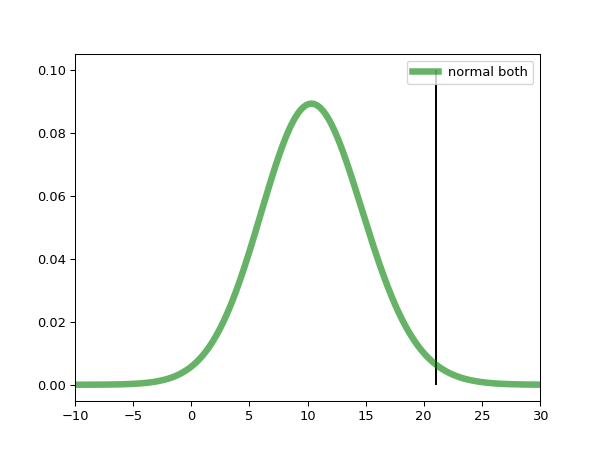

In [81]:
%matplotlib notebook
fig, ax= plt.subplots()
x=np.linspace(-10,30,1000)
men=stats.norm.pdf(x, 11, 5)
women=stats.norm.pdf(x, 10, 4)
# ax.plot(x, men,'r-', lw=5, alpha=0.6, label='normal men')
# ax.plot(x, women,'b-', lw=5, alpha=0.6, label='normal women')
ax.plot(x, (men+women)/2, 'g', lw=5, alpha=0.6, label='normal both')
ax.set(xlim=(-10,30))
ax.vlines(x[len(comb[mask])], 0,0.1)
plt.legend()

In [50]:
max(men)

0.07978781649666858

In [72]:
mask=stats.norm.cdf(x, loc=11, scale=5)+stats.norm.cdf(x, loc=10, scale=4)<1.975

In [73]:
comb=stats.norm.cdf(x, loc=11, scale=5)+stats.norm.cdf(x, loc=10, scale=4)

In [74]:
xlim=x[len(comb[mask])]

In [75]:
1-stats.norm.cdf(x, loc=11, scale=5)[len(comb[mask])]

0.02199352398596277

In [76]:
1-stats.norm.cdf(x, loc=10, scale=4)[len(comb[mask])]

0.002822082932302572